<a href="https://colab.research.google.com/github/saharCoder/MachineLearning/blob/main/CardiovascularDiseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
! mkdir ~/.kaggle
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alphiree/cardiovascular-diseases-risk-prediction-dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
User cancelled operation


In [ ]:
! unzip /content/cardiovascular-diseases-risk-prediction-dataset.zip

Archive:  /content/cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: CVD_cleaned.csv         


# Project Description:

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.
This dataset contains variables that relates to lifestyle factors of a person that can be contributed to being at risk with any form of Cardiovascular Diseases.

## 1. Frame the problem

- What is the model?

Classification model whether a person have a diseas or not
- What is the project objective?

Analyis the given varibale to conclude factors that led a person to have a diseas in order to ealry predict if a person will have a diseas or not

- What algorithm will be selected?

I will try different classification algorithms and compare their performance


## 2. Select ta Performance Measure

A typical measure for a classification model:
- Accurace
- Recall
- Percision
- F1 Score

## 3. Check the assumption

Do we need to output a numerical value or a class label?
Our main label is 'Heart_Disease' which will contain a class 0 and 1

## 4. Loading important packages and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 5. Get the data

In [ ]:
#Read the csv file into a pandas dataframe
df=pd.read_csv('CVD_cleaned.csv')

### 5.1. Take a quick look at the data

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

There are 7 numerical variables, and (12) catogrical variables

In [ ]:
print('Rows: ',df.shape[0], '|| Columns: ',df.shape[1])

Rows:  308854 || Columns:  19


The amount of observation in the whole dataset is quite large, and it looks like there are no missing values

In [ ]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [ ]:
df.describe(exclude='number').T

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,308854,2,No,283883
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

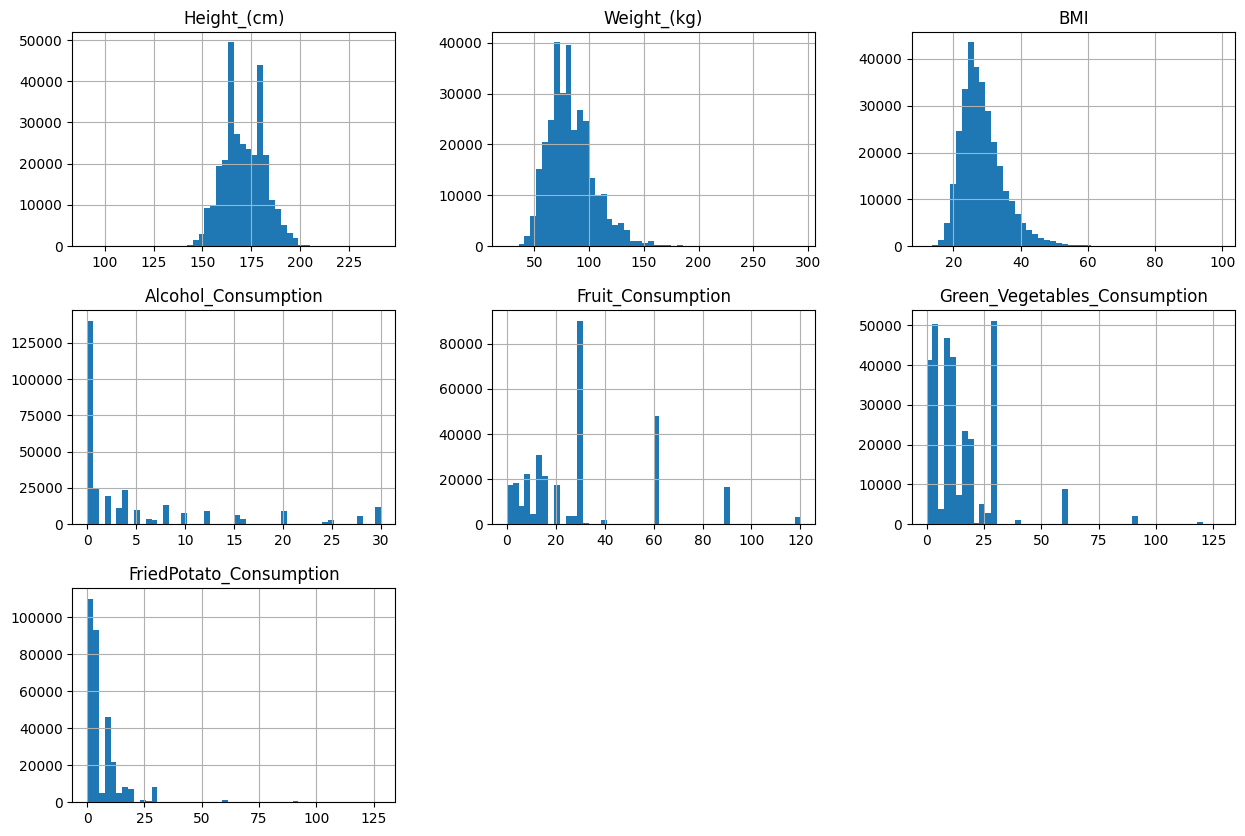

In [ ]:
df.hist(bins=50,figsize=(15,10))

One things need to focus on is theat the ranges of values across the columns differnet "NEED SCALING".

Another thing, we need to try to make the data more bell curved

## 6. Exploratory Data Analysis

We will start exploring each column to better understand the data

In [ ]:
features=list(df.columns)
features

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Smoking_History',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

### 'General_Health'

In [ ]:
df['General_Health'].dtype

dtype('O')

In [ ]:
df['General_Health'].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

The ['General_Health'] variable contains 5 different catogries, these catogries are ordinal in which we can use ordinal label encoding, because closer number indicate similar meaning and charactristic

In [ ]:
def pirplotter(data,keys):
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')

    # plotting data on chart
    pt.pie(data, labels=keys, colors=palette_color, autopct='%.00f%%')

    # displaying chart
    pt.show()

In [ ]:
def barplotter(data,keys):
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')

    # plotting data on chart
    pt.bar(data, labels=keys, colors=palette_color, autopct='%.00f%%')

    # displaying chart
    pt.show()

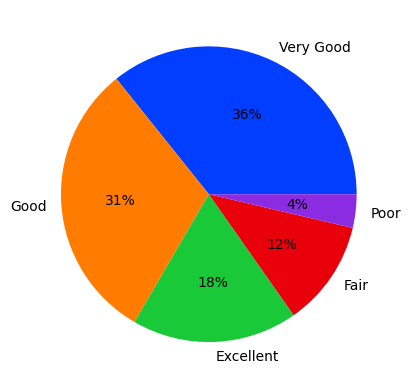

In [ ]:
# Pie chart
keys=list(df['General_Health'].value_counts().index)
data=list(df['General_Health'].value_counts().values)
pirplotter(data,keys)

only 4% of the dataset represent the Poor class, and 36% "Most classes" have Very Good health

It can be ordered like this: Poor - Fair - Good - Very Good - Excellent

In [ ]:
map_dictionary = {'Poor': 0, 'Fair': 1,'Good':2,'Very Good':3,'Excellent':4}
df['health_map'] = df['General_Health'].map(map_dictionary)
df['health_map']

0         0
1         3
2         3
3         0
4         2
         ..
308849    3
308850    1
308851    3
308852    3
308853    4
Name: health_map, Length: 308854, dtype: int64

### Checkup

In [ ]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

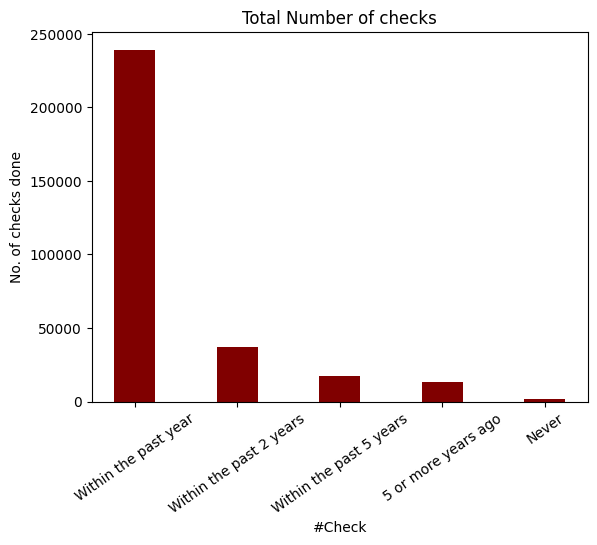

In [ ]:
# Pie chart
k=list(df['Checkup'].value_counts().index)
d=list(df['Checkup'].value_counts().values)
# creating the bar plot
pt.bar(k, d, color ='maroon',
        width = 0.4)

pt.xticks(rotation = 35)
pt.xlabel("#Check")
pt.ylabel("No. of checks done")
pt.title("Total Number of checks")
pt.show()

<Axes: xlabel='Checkup', ylabel='Count'>

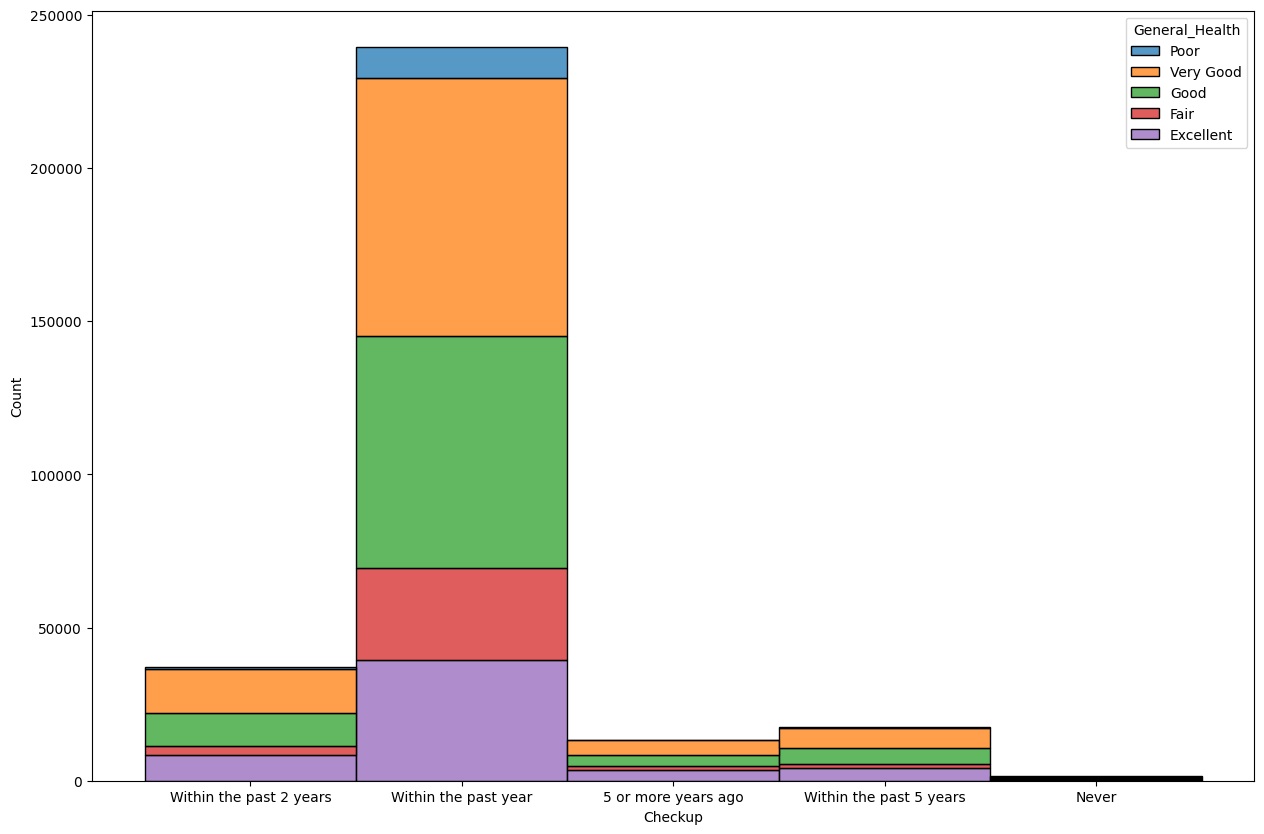

In [ ]:
fig, ax = pt.subplots(figsize=(15, 10))
sns.histplot(binwidth=0.5, x="Checkup", hue="General_Health", data=df, stat="count", multiple="stack")


Most of Poor health condition is on the people who had their check within the past year, on the other hand, people had their check in

### Exercise

In [ ]:
df['Exercise'].value_counts()

Yes    239381
No      69473
Name: Exercise, dtype: int64

Exercise variable is a catogircal variable "Needs to be encoded later"

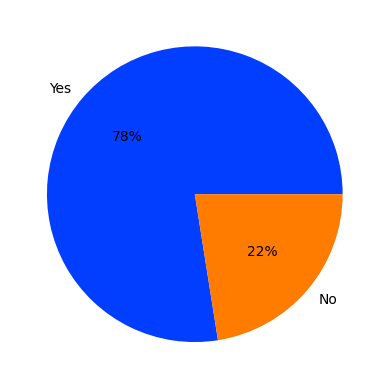

In [ ]:
keys=list(df['Exercise'].value_counts().index)
data=list(df['Exercise'].value_counts().values)
pirplotter(data,keys)

Only 22% recoreds that do not perform any form of exercise

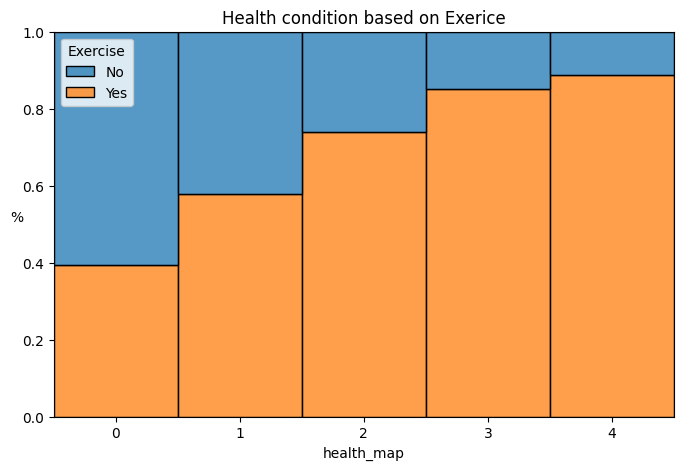

In [ ]:

# Histogram

pt.figure(figsize=(8,5))
sns.histplot(data=df,
             x='health_map',
             #bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='Exercise',
             multiple='fill',
             discrete=True)
pt.ylabel('%', rotation=0)
pt.title('Health condition based on Exerice');

based on this graph, most people who perform any type of physical activity have a very good health condition

### Heart_Disease


In [ ]:
df['Heart_Disease'].value_counts()

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

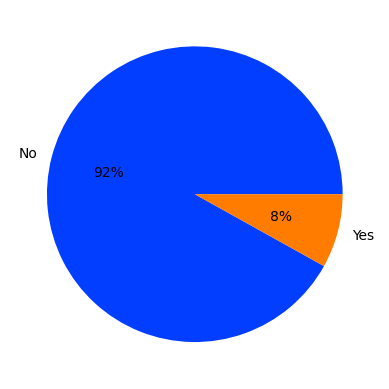

In [ ]:
keys=list(df['Heart_Disease'].value_counts().index)
data=list(df['Heart_Disease'].value_counts().values)
pirplotter(data,keys)

Only 8% of the records have heart disease!!

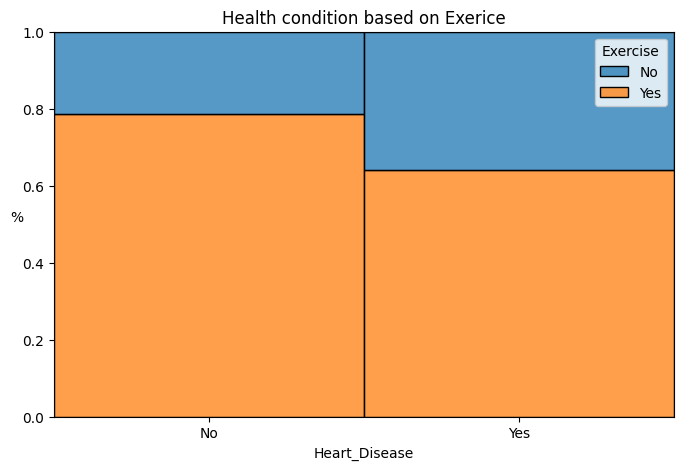

In [ ]:
#heart disease by physical activity
pt.figure(figsize=(8,5))
sns.histplot(data=df,
             x='Heart_Disease',
             #bins=range(0,1201,20), #this is to specify the range to get only users drove at most 1200 km
             hue='Exercise',
             multiple='fill',
             discrete=True)
pt.ylabel('%', rotation=0)
pt.title('Health condition based on Exerice');

### Skin_Cancer

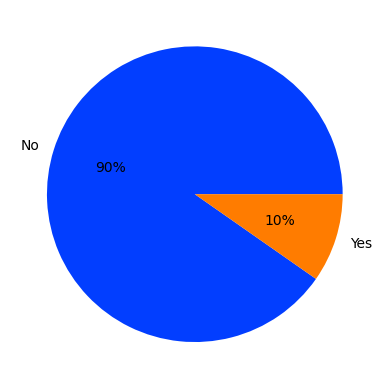

In [ ]:
keys=list(df['Skin_Cancer'].value_counts().index)
data=list(df['Skin_Cancer'].value_counts().values)
pirplotter(data,keys)

### Other_Cancer

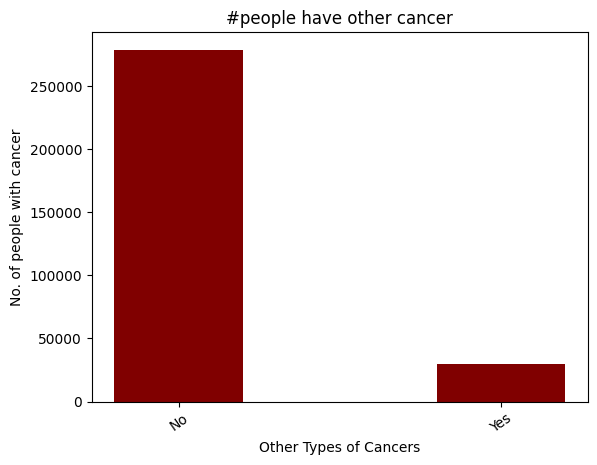

In [ ]:
# Pie chart
k=list(df['Other_Cancer'].value_counts().index)
d=list(df['Other_Cancer'].value_counts().values)
# creating the bar plot
pt.bar(k, d, color ='maroon',
        width = 0.4)

pt.xticks(rotation = 35)
pt.xlabel("Other Types of Cancers")
pt.ylabel("No. of people with cancer")
pt.title("#people have other cancer")
pt.show()

### Depression

In [ ]:
df['Depression'].value_counts()

No     246953
Yes     61901
Name: Depression, dtype: int64

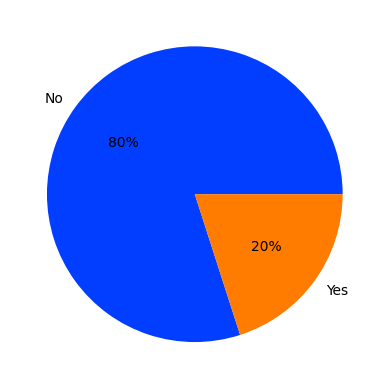

In [ ]:
keys=list(df['Depression'].value_counts().index)
data=list(df['Depression'].value_counts().values)
pirplotter(data,keys)

### Diabetes

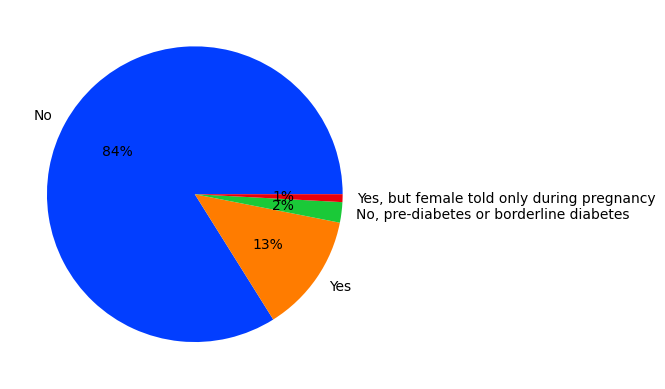

In [ ]:
keys=list(df['Diabetes'].value_counts().index)
data=list(df['Diabetes'].value_counts().values)
pirplotter(data,keys)

### Arthritis

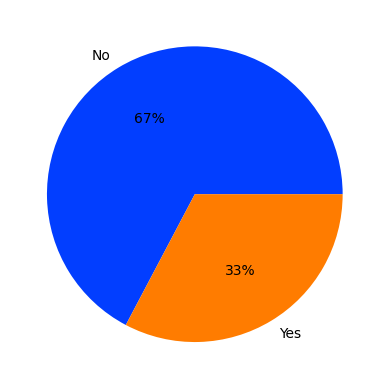

In [ ]:
keys=list(df['Arthritis'].value_counts().index)
data=list(df['Arthritis'].value_counts().values)
pirplotter(data,keys)

We can plot the percentage of each disease to see comparision

In [ ]:
heart=list(df['Heart_Disease'].value_counts().values)
skin=list(df['Skin_Cancer'].value_counts().values)
ocancer=list(df['Other_Cancer'].value_counts().values)
#diabetes=list(df['Diabetes'].value_counts().values)
arth=list(df['Arthritis'].value_counts().values)
dipp=list(df['Depression'].value_counts().values)

alldisease=[heart,skin,ocancer,arth,dipp]


### Sex

<Axes: xlabel='Heart_Disease'>

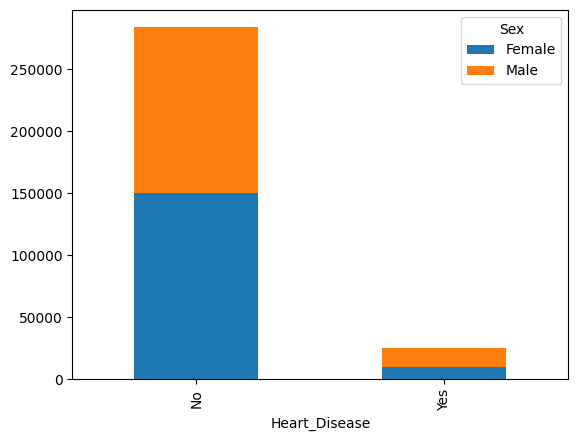

In [ ]:
pd.crosstab(df['Heart_Disease'],df['Sex']).plot(kind="bar",stacked=True)


<Axes: xlabel='General_Health'>

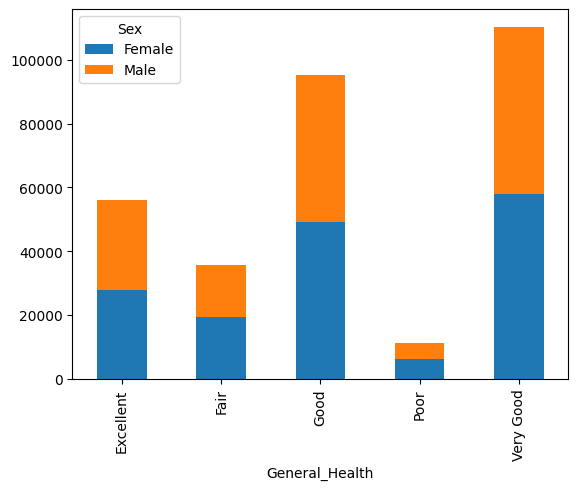

In [ ]:
pd.crosstab(df['General_Health'],df['Sex']).plot(kind="bar",stacked=True)


<Axes: xlabel='Skin_Cancer'>

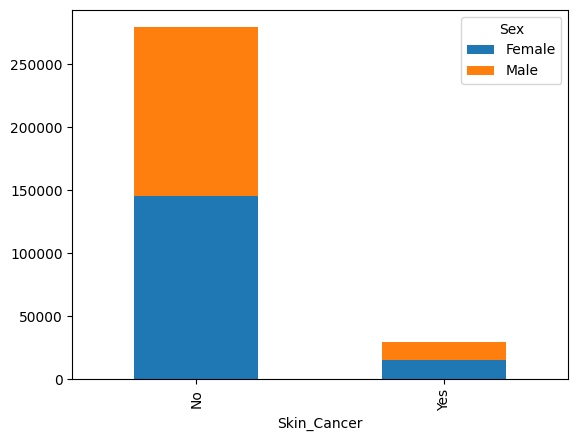

In [ ]:
pd.crosstab(df['Skin_Cancer'],df['Sex']).plot(kind="bar",stacked=True)

<Axes: xlabel='Depression'>

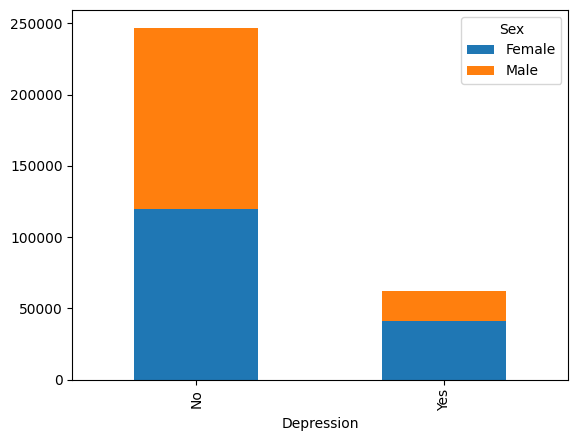

In [ ]:
pd.crosstab(df['Depression'],df['Sex']).plot(kind="bar",stacked=True)

It seems like more females have depression than males

<Axes: xlabel='Arthritis'>

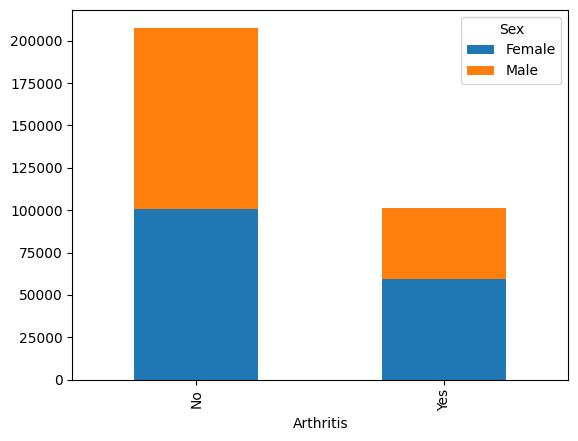

In [ ]:
pd.crosstab(df['Arthritis'],df['Sex']).plot(kind="bar",stacked=True)

In [ ]:
# Replace multiple values
# 1. Convert infinite values to zero
map_dictionary = {'No': 0, 'Yes':1}
df['Exercise'] = df['Exercise'].map(map_dictionary)
df['Heart_Disease'] = df['Heart_Disease'].map(map_dictionary)
df['Skin_Cancer'] = df['Skin_Cancer'].map(map_dictionary)
df['Depression'] = df['Depression'].map(map_dictionary)
df['Diabetes'] = df['Diabetes'].map(map_dictionary)
df['Arthritis'] = df['Arthritis'].map(map_dictionary)
df['Other_Cancer'] = df['Other_Cancer'].map(map_dictionary)

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,health_map
0,Poor,Within the past 2 years,0,0,0,0,0,0.0,1,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,0
1,Very Good,Within the past year,0,1,0,0,0,1.0,0,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,3
2,Very Good,Within the past year,1,0,0,0,0,1.0,0,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,3
3,Poor,Within the past year,1,1,0,0,0,1.0,0,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,0
4,Good,Within the past year,0,0,0,0,0,0.0,0,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,2


In [ ]:
df['Depression'].value_counts()

0    246953
1     61901
Name: Depression, dtype: int64

In [ ]:
#'Arthritis','Depression','Skin_Cancer'
df_group=df.groupby(['Sex'],as_index=False).sum()

<ipython-input-43-04d43ae65884>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group=df.groupby(['Sex'],as_index=False).sum()


In [ ]:
df_group[['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis']]

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis
0,120338,9898,15115,17415,40845,19613.0,59668
1,119043,15073,14879,12463,21056,20558.0,41403


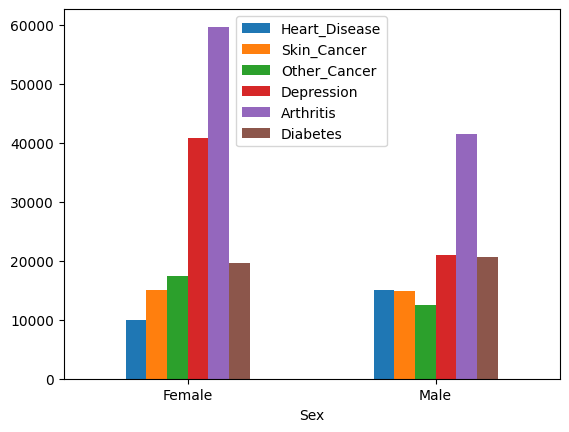

In [ ]:
#Plotting this
# plotting graph
ax = df_group.plot(x="Sex", y=["Heart_Disease", "Skin_Cancer", "Other_Cancer",'Depression','Arthritis','Diabetes'], kind="bar", rot=0)


This shows that in most of disease females and males are almost similar, but females have more depression and arthities

### Age_Category

In [ ]:
df['Age_Category'].value_counts()

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64

Why do ages ranges in bins with 4 year different in between?

<Axes: xlabel='Age_Category'>

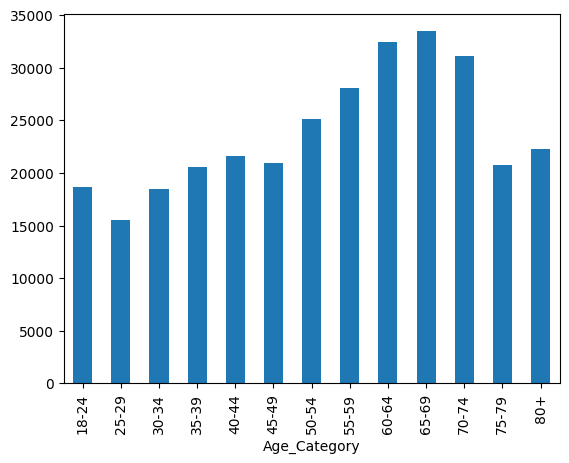

In [ ]:
df.groupby('Age_Category').size().plot(kind='bar')

Do people with one bin difference have different health condition?

In [ ]:
df1_group=df.groupby(['Age_Category'],as_index=False).sum()

<ipython-input-48-a5e9c7a5f021>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_group=df.groupby(['Age_Category'],as_index=False).sum()


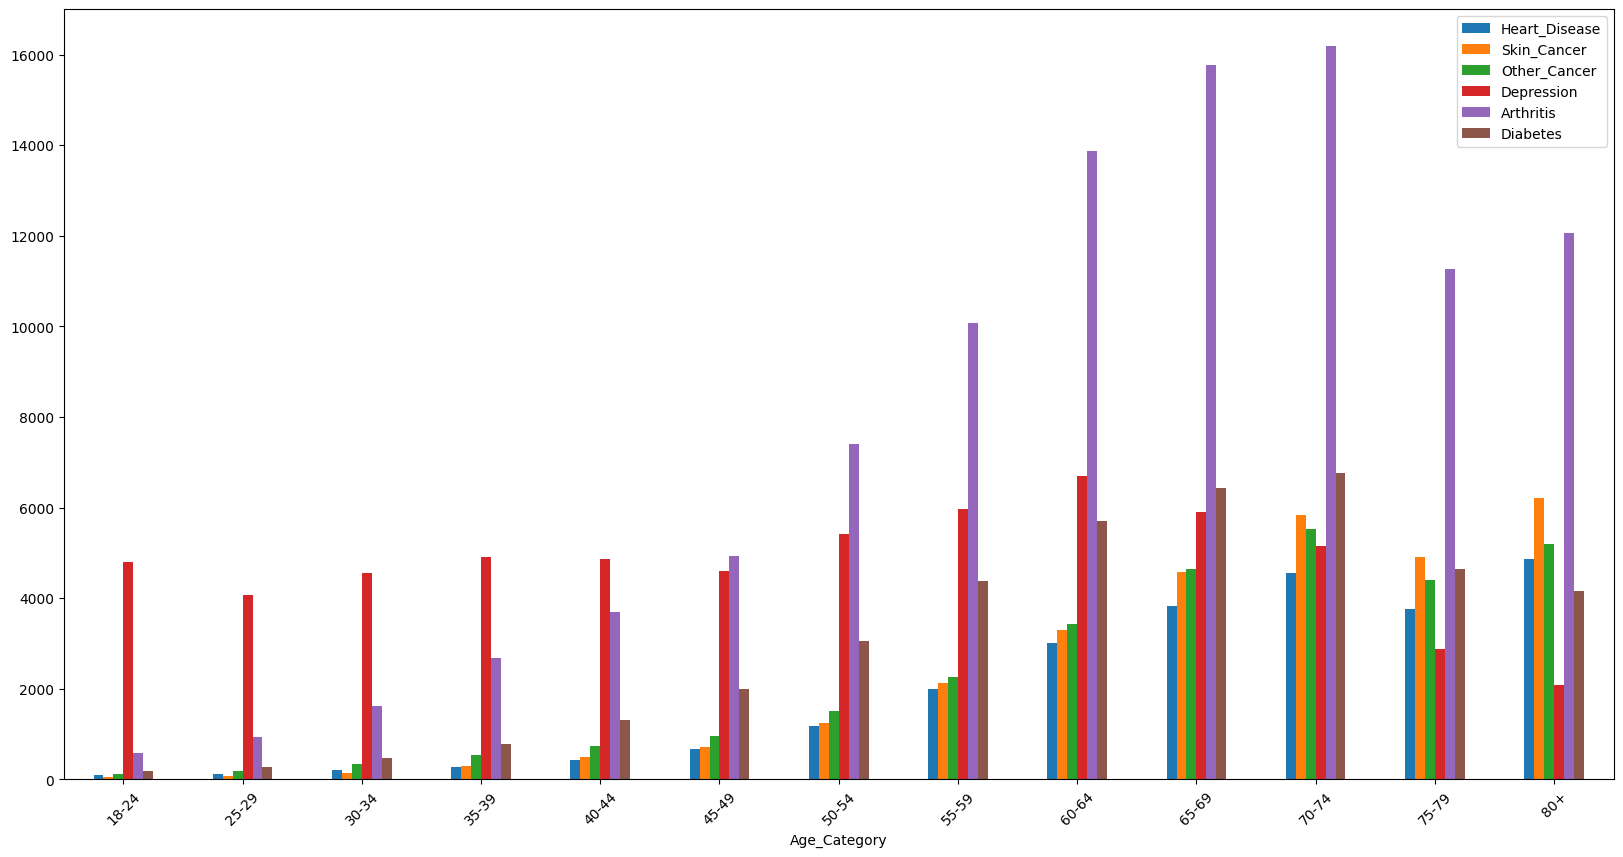

In [ ]:
ax = df1_group.plot(x="Age_Category", y=["Heart_Disease", "Skin_Cancer", "Other_Cancer",'Depression','Arthritis','Diabetes'], kind="bar", rot=45,figsize=(20, 10))

As we assumed, as a person get older he might face a health problem like "Arthritis"

<Axes: xlabel='Age_Category', ylabel='Count'>

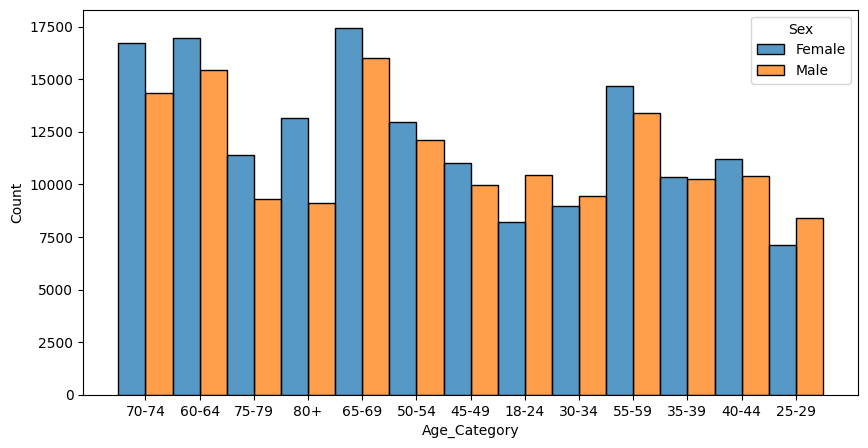

In [ ]:
#plot age and gender variables
#sns.relplot(x=df["Sex"],  hue=df["Age_Category"]) # Notice how for hue
fig, ax = pt.subplots(figsize=(10, 5))
sns.histplot(binwidth=1,
            x='Age_Category',
            hue='Sex',
            data=df,
            stat="count",
            multiple="dodge")

### Function

In [ ]:
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    fig, ax = pt.subplots(figsize=(5, 4))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    pt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    pt.title(f'{column_str} histogram');


def boxplotter(column,xlabel,title): # Box plot
  fig, ax = pt.subplots(figsize=(5, 4))
  box = sns.boxplot(x=df[column])
  g = pt.gca()
  #box.set_xticklabels(np.array([readable_numbers(x) for x in g. 􏰀→get_xticks()]))
  pt.xlabel(xlabel)
  pt.title(title)
  pt.show()

### Height_(cm)

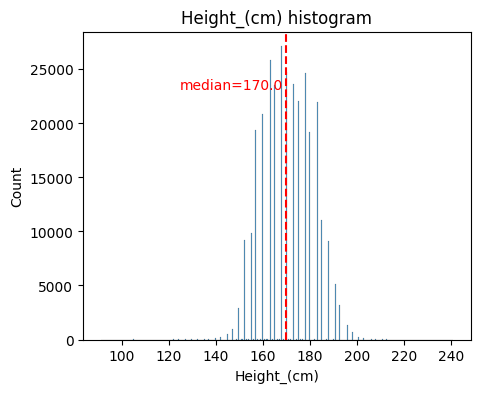

In [ ]:
histogrammer('Height_(cm)',True)

In [ ]:
#what is the average heigth by gender?
a=df.groupby(['Sex'],as_index=False).median('Height_(cm)')


In [ ]:
womenh=int(a[a['Sex']=='Female']['Height_(cm)'].values[0])
menh=int(a[a['Sex']=='Male']['Height_(cm)'].values[0])

In [ ]:
print('The average height for females: ',womenh)
print('The average height for males:   ',menh)

The average height for females:  163
The average height for males:    178


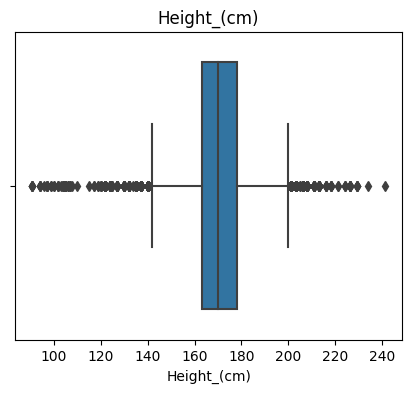

In [ ]:
boxplotter('Height_(cm)','Height_(cm)','Height_(cm)')

In [ ]:
print(df['Height_(cm)'].max())
print(df['Height_(cm)'].min())

241.0
91.0


### Weight_(kg)

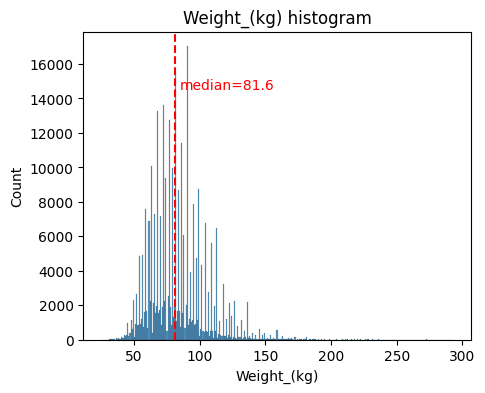

In [ ]:
histogrammer('Weight_(kg)',True)

In [ ]:
a=df.groupby(['Sex'],as_index=False).median('Weight_(kg)')
womenw=int(a[a['Sex']=='Female']['Weight_(kg)'].values[0])
menw=int(a[a['Sex']=='Male']['Weight_(kg)'].values[0])
print('The average weight for females: ',womenw)
print('The average weight for males:   ',menw)

The average weight for females:  72
The average weight for males:    88


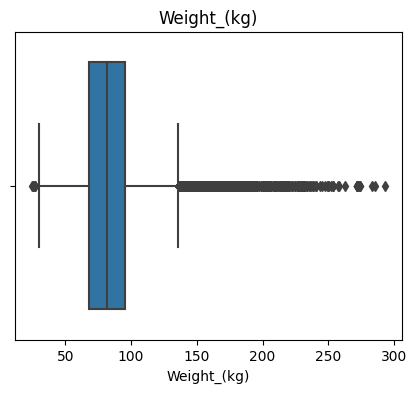

In [ ]:
boxplotter('Weight_(kg)','Weight_(kg)','Weight_(kg)')

### BMI

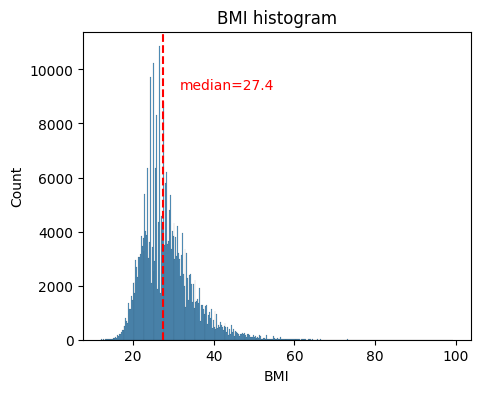

In [ ]:
histogrammer('BMI',True)

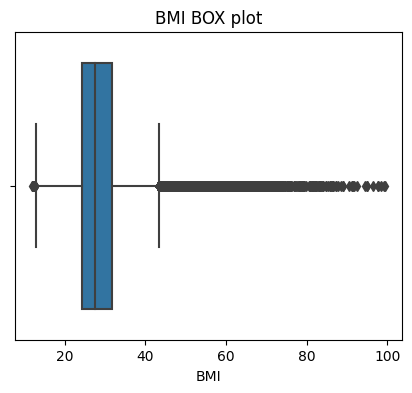

In [ ]:
boxplotter('BMI','BMI','BMI BOX plot')

### Smoking_History

### Alcohol_Consumption

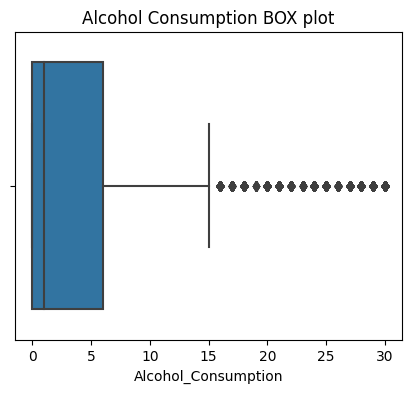

In [ ]:
boxplotter('Alcohol_Consumption','Alcohol_Consumption','Alcohol Consumption BOX plot')

In [ ]:
df['Alcohol_Consumption'].value_counts()

0.0     140262
1.0      24983
4.0      23367
2.0      19740
8.0      13438
30.0     11976
3.0      11479
5.0       9622
20.0      9372
12.0      8825
10.0      7881
15.0      6178
28.0      5935
16.0      3602
6.0       3518
25.0      2670
7.0       2572
24.0      1253
14.0       486
29.0       309
9.0        239
27.0       205
21.0       197
18.0       196
22.0       152
26.0       126
17.0        78
13.0        76
23.0        65
11.0        41
19.0        11
Name: Alcohol_Consumption, dtype: int64

### Fruit_Consumption

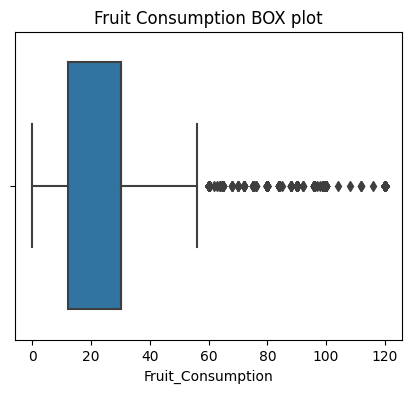

In [ ]:
boxplotter('Fruit_Consumption','Fruit_Consumption','Fruit Consumption BOX plot')

### Green_Vegetables_Consumption

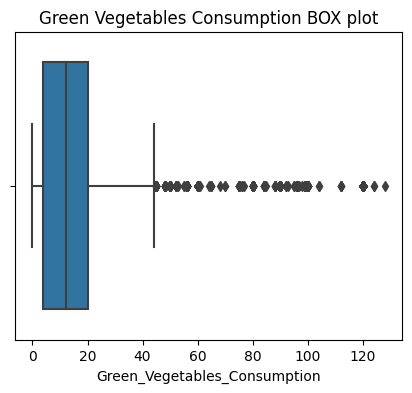

In [ ]:
boxplotter('Green_Vegetables_Consumption','Green_Vegetables_Consumption','Green Vegetables Consumption BOX plot')

### FriedPotato_Consumption

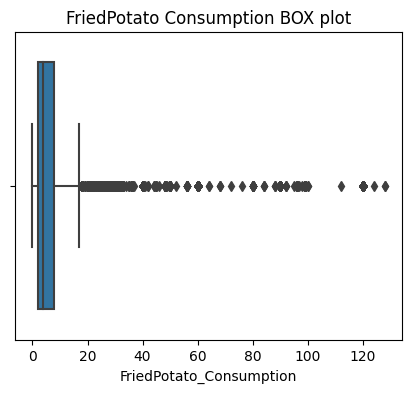

In [ ]:
boxplotter('FriedPotato_Consumption','FriedPotato_Consumption','FriedPotato Consumption BOX plot')

## Handling Outliers

In [ ]:
import math
def outlierdetector(column):
  a=list()
  percentile25 = df[column].quantile(0.25)
  # Calculate 75th percentile of annual strikes
  percentile75 = df[column].quantile(0.75)

  # Calculate interquartile range
  iqr = percentile75 - percentile25

  # Calculate upper and lower thresholds for outliers
  upper_limit = math.floor(percentile75 + 1.5 * iqr)
  lower_limit = math.floor(percentile25 - 1.5 * iqr)
  a.append(upper_limit)
  a.append(lower_limit)
  #Only care for the upper limit because we mentioned that the data is skewed to the right of the median
  print('Upper limit is: ', upper_limit)
  print('Lower limit is: ', lower_limit)
  return a

In [ ]:
# Calculate 25th percentile of annual strikes
percentile25 = df['Height_(cm)'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['Height_(cm)'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Only care for the upper limit because we mentioned that the data is skewed to the right of the median
print('Upper limit is: ', upper_limit)

Upper limit is:  200.5


In [ ]:
df=df[(df['Height_(cm)'] >= lower_limit) & (df['Height_(cm)'] <=upper_limit)]

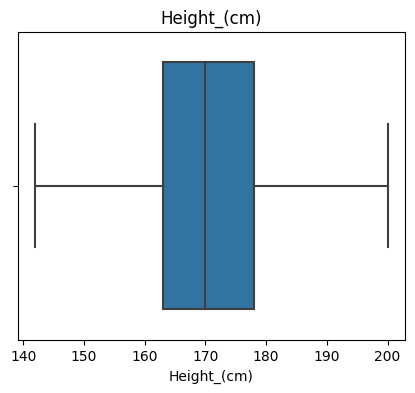

In [ ]:
boxplotter('Height_(cm)','Height_(cm)','Height_(cm)')

In [ ]:
limits=outlierdetector('Weight_(kg)')

Upper limit is:  136
Lower limit is:  27


In [ ]:
limits

[136, 27]

In [ ]:
df=df[(df['Weight_(kg)'] >= limits[1]) & (df['Weight_(kg)'] <=limits[0])]

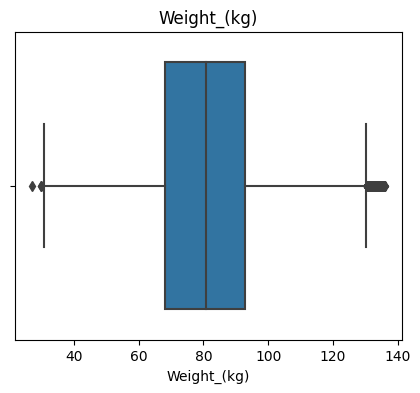

In [ ]:
boxplotter('Weight_(kg)','Weight_(kg)','Weight_(kg)')

In [ ]:
limits=outlierdetector('BMI')
df=df[(df['BMI'] >= limits[1]) & (df['BMI'] <=limits[0])]

Upper limit is:  42
Lower limit is:  13


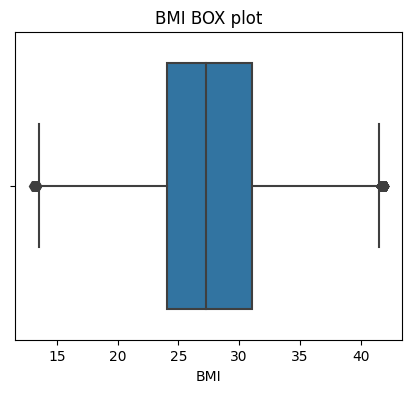

In [ ]:
boxplotter('BMI','BMI','BMI BOX plot')

Upper limit is:  17
Lower limit is:  -11


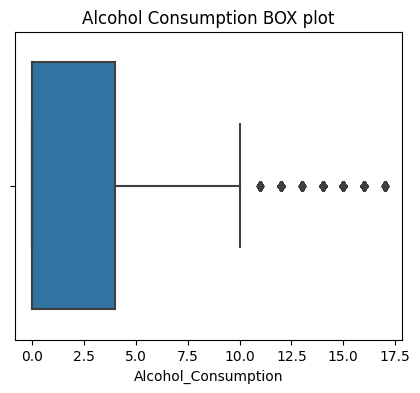

In [ ]:
limits=outlierdetector('Alcohol_Consumption')
df=df[(df['Alcohol_Consumption'] >= limits[1]) & (df['Alcohol_Consumption'] <=limits[0])]
boxplotter('Alcohol_Consumption','Alcohol_Consumption','Alcohol Consumption BOX plot')

Upper limit is:  57
Lower limit is:  -15


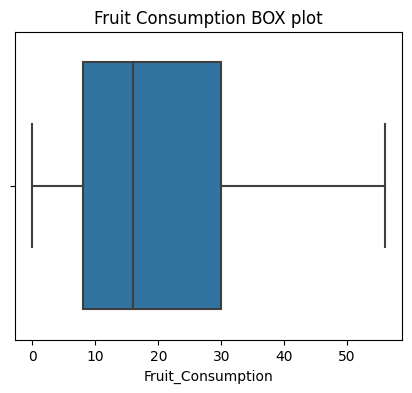

In [ ]:
limits=outlierdetector('Fruit_Consumption')
df=df[(df['Fruit_Consumption'] >= limits[1]) & (df['Fruit_Consumption'] <=limits[0])]
boxplotter('Fruit_Consumption','Fruit_Consumption','Fruit Consumption BOX plot')

Upper limit is:  44
Lower limit is:  -20


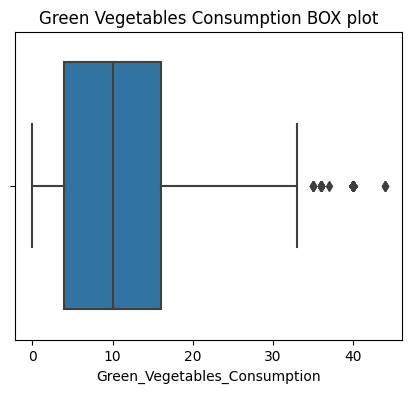

In [ ]:
limits=outlierdetector('Green_Vegetables_Consumption')
df=df[(df['Green_Vegetables_Consumption'] >= limits[1]) & (df['Green_Vegetables_Consumption'] <=limits[0])]
boxplotter('Green_Vegetables_Consumption','Green_Vegetables_Consumption','Green Vegetables Consumption BOX plot')

Upper limit is:  17
Lower limit is:  -7


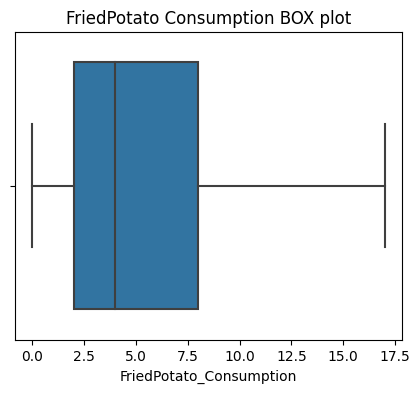

In [ ]:
limits=outlierdetector('FriedPotato_Consumption')
df=df[(df['FriedPotato_Consumption'] >= limits[1]) & (df['FriedPotato_Consumption'] <=limits[0])]
boxplotter('FriedPotato_Consumption','FriedPotato_Consumption','FriedPotato Consumption BOX plot')

## Dataset Statistics

In [ ]:
df.describe()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,health_map
count,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000,179788.000000,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000,185592.000000
mean,0.757872,0.084707,0.093490,0.097100,0.198026,0.137456,0.322336,170.394155,81.791675,28.072127,2.695472,18.481174,11.944804,4.887554,2.502770
std,0.428372,0.278446,0.291119,0.296095,0.398513,0.344329,0.467372,10.370175,17.943875,5.186454,4.066449,10.886001,9.608514,4.255574,1.024553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.000000,31.750000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,68.040000,24.330000,0.000000,8.000000,4.000000,2.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,81.650000,27.460000,0.000000,16.000000,10.000000,4.000000,3.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,178.000000,92.990000,31.410000,4.000000,30.000000,16.000000,8.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,136.000000,41.990000,17.000000,56.000000,44.000000,17.000000,4.000000


In [ ]:
df.shape

(185592, 20)

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>],
       [<Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Height_(cm)'}>],
       [<Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>],
       [<Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>,
        <Axes: title={'center': 'health_map'}>, <Axes: >]], dtype=object)

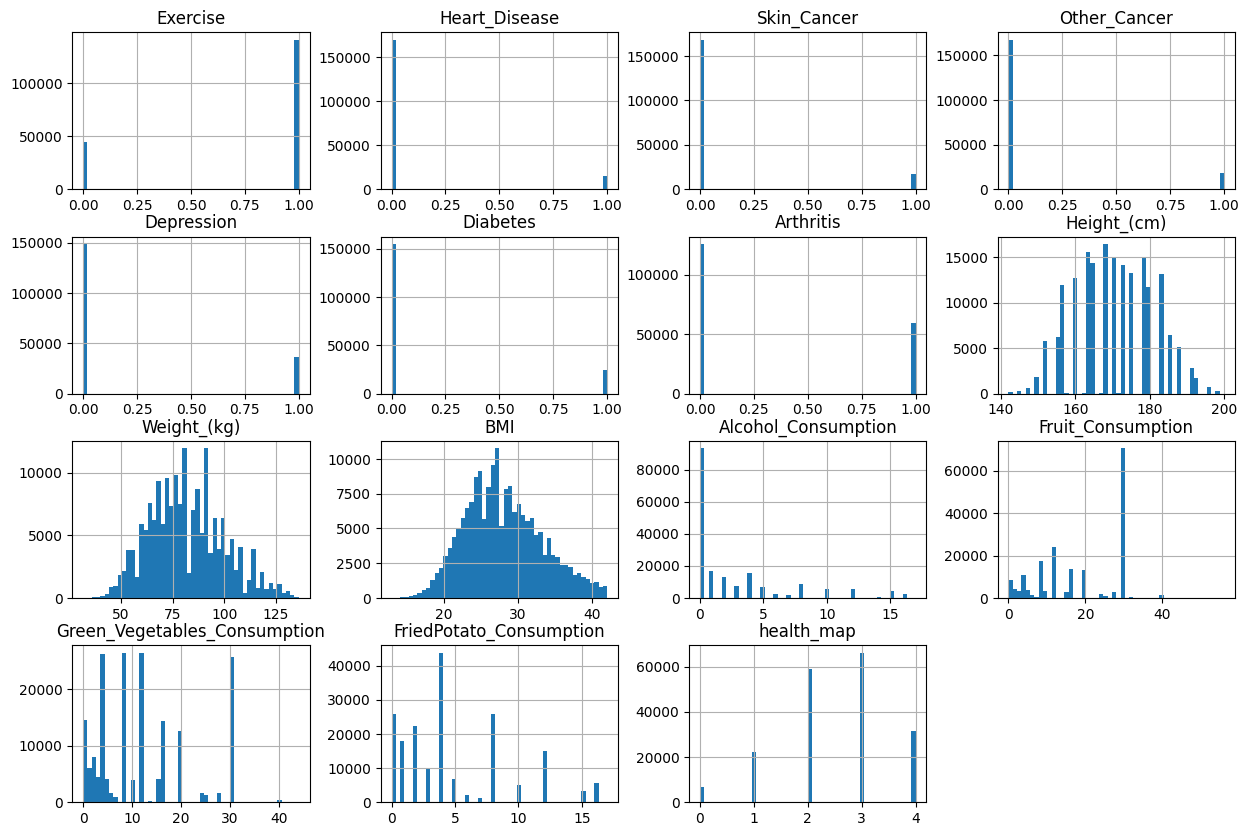

In [ ]:
df.hist(bins=50,figsize=(15,10))

## Feature Engineering: Extraction

Adult Body Mass Index or BMI
BMI is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness, and a low BMI can indicate too low body fatness. To calculate your BMI, see the BMI Calculator. Or determine your BMI by finding your height and weight in this BMI Index Chart.

- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
- If your BMI is 25.0 to 29.9, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obese range.

In [ ]:
# create a list of our conditions
decimals = 1
df['BMI'] = df['BMI'].apply(lambda x: round(x, decimals))
conditions = [
    (df['BMI'] <18.5 ),
    (df['BMI'] >=18.5) & (df['BMI'] <= 24.9),
    (df['BMI'] >= 25.0) & (df['BMI'] <= 29.9),
    (df['BMI'] >= 30)
    ]

# create a list of the values we want to assign for each condition
values = ['underweight', 'healthy', 'overweight', 'obese']

# create a new column and use np.select to assign values to it using our lists as arguments
df['body_fatness'] = np.select(conditions, values)

# display updated DataFrame
df[['BMI','body_fatness']].head()

,BMI,body_fatness
0,14.5,underweight
1,28.3,overweight
2,33.5,obese
3,28.7,overweight
4,24.4,healthy


## Label Encoding

In [ ]:
df.drop('General_Health',axis=1,inplace=True)

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [ ]:
features_to_encode = ['body_fatness']
for feature in features_to_encode:
    res = encode_and_bind(df, feature)

In [ ]:
df=res

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Checkup'] = labelencoder.fit_transform(df['Checkup'])
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Age_Category'] = labelencoder.fit_transform(df['Age_Category'])
df['Smoking_History'] = labelencoder.fit_transform(df['Smoking_History'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185592 entries, 0 to 308853
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Checkup                       185592 non-null  int64  
 1   Exercise                      185592 non-null  int64  
 2   Heart_Disease                 185592 non-null  int64  
 3   Skin_Cancer                   185592 non-null  int64  
 4   Other_Cancer                  185592 non-null  int64  
 5   Depression                    185592 non-null  int64  
 6   Diabetes                      179788 non-null  float64
 7   Arthritis                     185592 non-null  int64  
 8   Sex                           185592 non-null  int64  
 9   Age_Category                  185592 non-null  int64  
 10  Height_(cm)                   185592 non-null  float64
 11  Weight_(kg)                   185592 non-null  float64
 12  BMI                           185592 non-nul

## Model Constructing and Feature Selection

## Bivariate Analysis: Looking for Correlations

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix.T

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,health_map,body_fatness_healthy,body_fatness_obese,body_fatness_overweight,body_fatness_underweight
Checkup,1.000000,-0.033703,0.090006,0.079376,0.087640,0.035530,0.140468,0.152242,-0.096136,0.229917,...,0.001105,-0.051148,0.046747,0.047989,-0.060062,-0.095404,-0.050441,0.049759,0.001325,-0.012733
Exercise,-0.033703,1.000000,-0.097506,-0.015504,-0.058947,-0.079360,-0.137554,-0.125472,0.080310,-0.142205,...,-0.091851,0.141595,0.138279,0.136853,0.006600,0.264431,0.069635,-0.105794,0.043110,-0.019157
Heart_Disease,0.090006,-0.097506,1.000000,0.097595,0.097736,0.032040,0.191193,0.157481,0.071913,0.239352,...,0.116514,-0.074423,-0.015750,-0.019389,-0.027853,-0.239301,-0.040307,0.035119,0.003413,-0.001178
Skin_Cancer,0.079376,-0.015504,0.097595,1.000000,0.151535,-0.006871,0.051982,0.139521,0.011495,0.267040,...,0.034730,-0.015667,0.026153,0.021431,-0.039604,-0.062515,0.001321,-0.021180,0.020057,-0.002781
Other_Cancer,0.087640,-0.058947,0.097736,0.151535,1.000000,0.015269,0.076806,0.132311,-0.039427,0.238696,...,0.056325,-0.046040,0.008781,-0.000576,-0.049290,-0.153821,-0.010007,0.004012,0.003317,0.008486
Depression,0.035530,-0.079360,0.032040,-0.006871,0.015269,1.000000,0.038521,0.127275,-0.144452,-0.094056,...,0.105545,-0.025708,-0.056788,-0.058881,0.006464,-0.201881,-0.027529,0.074248,-0.050540,0.015658
Diabetes,0.140468,-0.137554,0.191193,0.051982,0.076806,0.038521,1.000000,0.144693,0.023815,0.237932,...,0.065610,-0.126010,-0.017988,-0.028988,-0.025501,-0.269256,-0.128091,0.157122,-0.026217,-0.029964
Arthritis,0.152242,-0.125472,0.157481,0.139521,0.132311,0.127275,0.144693,1.000000,-0.107932,0.378926,...,0.132708,-0.085750,0.000697,-0.010771,-0.075665,-0.273031,-0.094749,0.112306,-0.018470,-0.012999
Sex,-0.096136,0.080310,0.071913,0.011495,-0.039427,-0.144452,0.023815,-0.107932,1.000000,-0.064654,...,0.055038,0.101946,-0.059491,-0.066602,0.159112,0.031188,-0.087851,-0.004639,0.095389,-0.039779
Age_Category,0.229917,-0.142205,0.239352,0.267040,0.238696,-0.094056,0.237932,0.378926,-0.064654,1.000000,...,0.151357,-0.137926,0.063148,0.064042,-0.194242,-0.198747,-0.071962,0.014716,0.056984,-0.019551


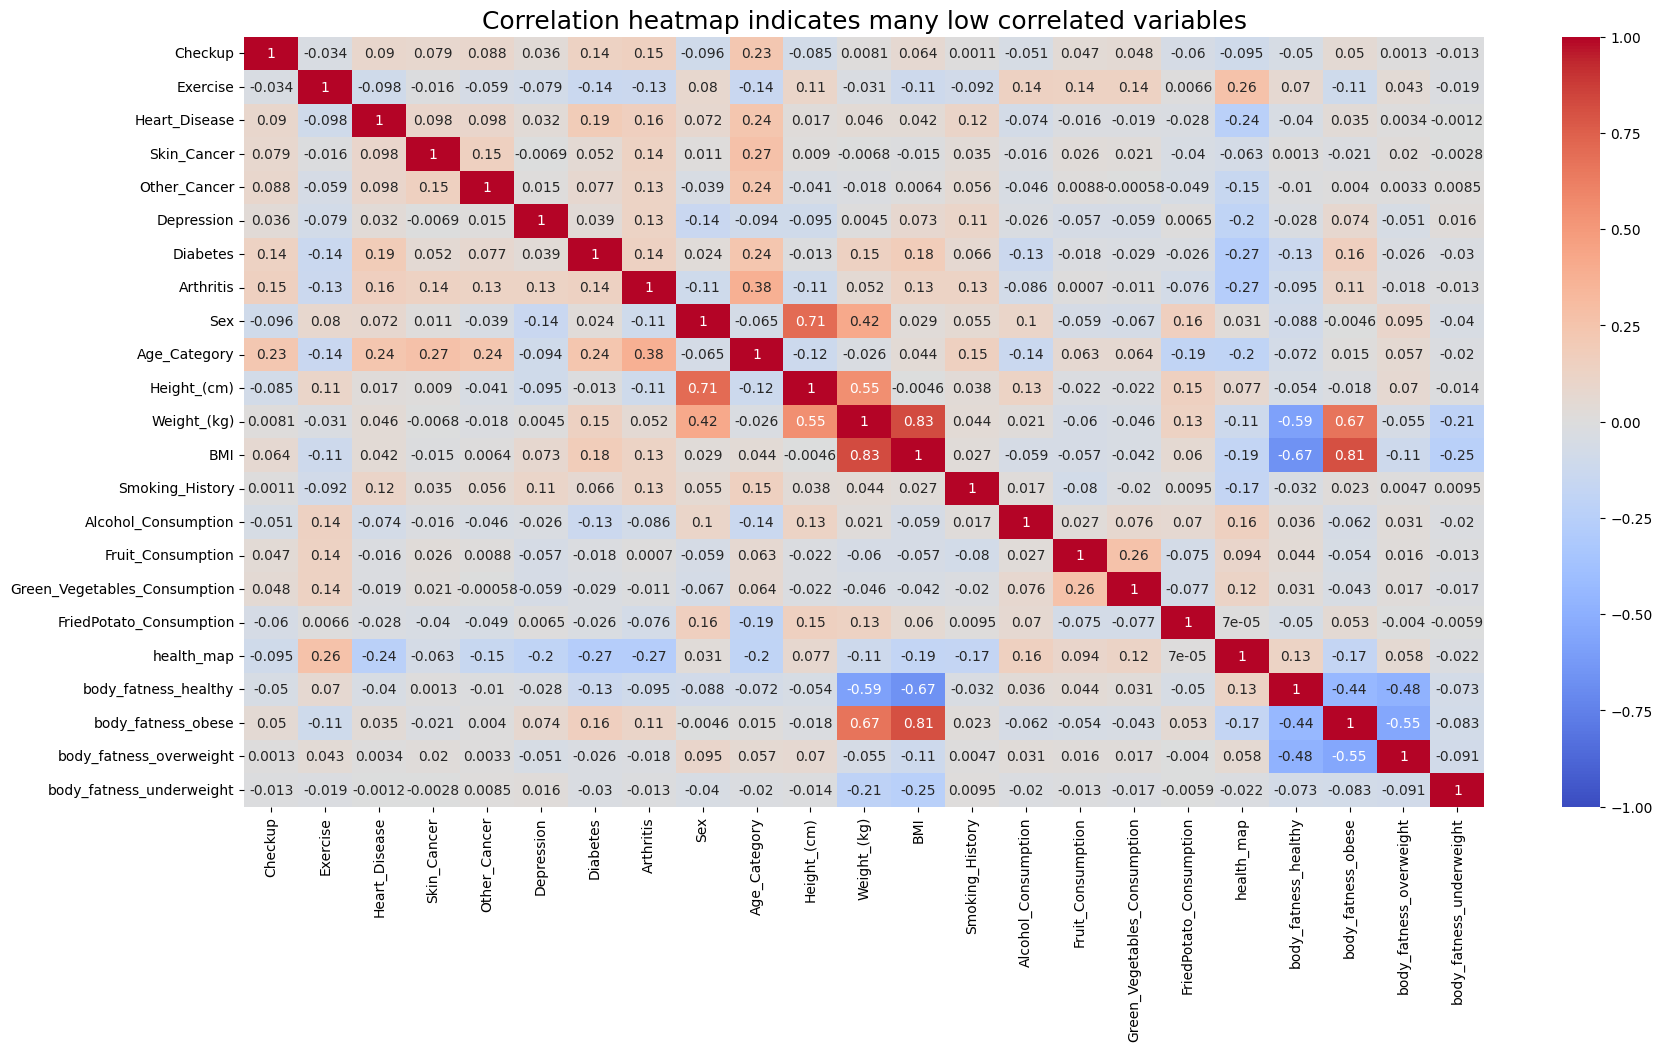

In [ ]:
# Plot correlation heatmap
pt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
pt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
pt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

Note: 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

Multicollinear variables:

- BMI & body_obese
- BMI & Weight

We will drop the BMI variable

## Feature Transformation: Scaling

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['Heart_Disease'], axis=1)
from sklearn.preprocessing import StandardScaler
# creating instance of labelencoder
standardScaler = StandardScaler()
# Assigning numerical values and storing in another column
X[X.columns] = standardScaler.fit_transform(X[X.columns])

y = df["Heart_Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Heart_Disease, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipline=[]
model_pipline.append(LogisticRegression())
model_pipline.append(SVC())
model_pipline.append(KNeighborsClassifier())
model_pipline.append(DecisionTreeClassifier())
model_pipline.append(RandomForestClassifier())
model_pipline.append(GaussianNB())

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#,'Decision Tree','Random Forest','Naive Bayes '
model_list=['Logistic Regression','SVC','KN']
acc_list=[]
auc_list=[]
cm_list=[]

lrmodel=LogisticRegression()
lrmodel.fit(X_train,y_train)
y_pred1=lrmodel.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test,y_pred1))
fpr,tpr,_thresholds=metrics.roc_curve(y_test,y_pred1)
auc_list.append(round(metrics.auc(fpr,tpr),2))
cm_list.append(confusion_matrix(y_test,y_pred1))

In [ ]:
svmodel=SVC()
svmodel.fit(X_train,y_train)
y_pred2=svmodel.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test,y_pred2))
fpr,tpr,_thresholds=metrics.roc_curve(y_test,y_pred2)
auc_list.append(round(metrics.auc(fpr,tpr),2))
cm_list.append(confusion_matrix(y_test,y_pred2))

In [ ]:
knmodel=KNeighborsClassifier()
knmodel.fit(X_train,y_train)
y_pred3=knmodel.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test,y_pred3))
fpr,tpr,_thresholds=metrics.roc_curve(y_test,y_pred3)
auc_list.append(round(metrics.auc(fpr,tpr),2))
cm_list.append(confusion_matrix(y_test,y_pred3))

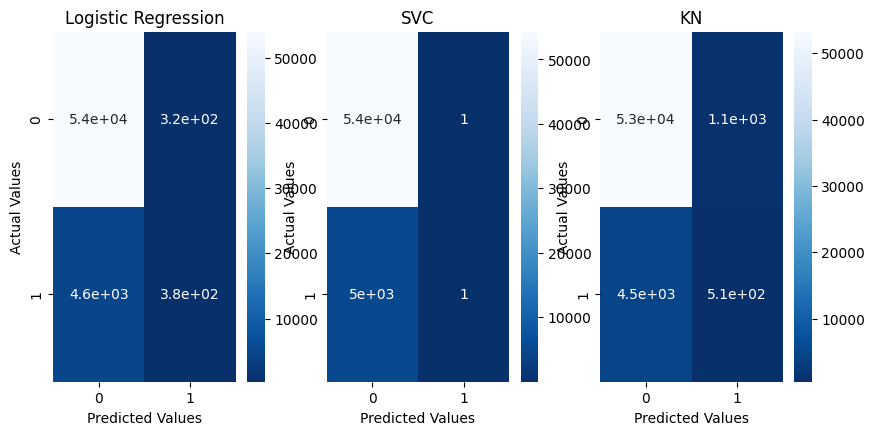

In [106]:
fig=pt.figure(figsize=(10,10))
for i in range(len(cm_list)):
  cm=cm_list[i]
  model=model_list[i]
  sub=fig.add_subplot(2,3,i+1).set_title(model)
  cm_plot=sns.heatmap(cm,annot=True,cmap='Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')


In [ ]:
result=pd.DataFrame({'Model': model_list,'Accuracy':acc_list,'AUC':auc_list})
result

,Model,Accuracy,AUC
0,Logistic Regression,0.916165,0.53
1,SVC,0.915289,0.50
2,KN,0.905918,0.54


## Random forest model training

In [107]:
from sklearn.ensemble import RandomForestClassifier

#Model Metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_pred = rfc.predict(X_test)


print('Accuracy:', '%.3f' % accuracy_score(y_test, rf_pred))
print('Precision:', '%.3f' % precision_score(y_test,rf_pred))
print('Recall:', '%.3f' % recall_score(y_test, rf_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, rf_pred))

Accuracy: 0.915
Precision: 0.448
Recall: 0.038
F1 Score: 0.070


## Quiestions

- Does the last time of check affect having heart diseas or not
- Compare the health of a person compared with the last time they checked
- Do people who exercise have better health condition?
- Why does females have more depression and arthities more than males? is it because of other variables?
- What new feature can be derived from weight and height /sex variable

## Insights and Findings
- 78% of people exercise
- 60% percentage of people who have Poor health condiditon
- Arount 90% of people who have excellent health condition do exercise
- Only 8% of people have heart disease
- Only 5% or people have Skin Cancer
- Females have more depression and arthities